## PREDIKSI RISIKO SAHAM PERUSAHAAN DI SUMATERA BAGIAN SELATAN MENGGUNAKAN METODE ACCEPTANCE-REJECTION DAN INVERSE TRANSFORM

**Masalah:**

Masalah yang diangkat adalah ketidakpastian dalam pasar keuangan. Kita tahu bagaimana portofolio saham (PTBA, SMBR, RMKE) berperilaku di masa lalu (data 4 tahun terakhir), tetapi tidak tahu sama sekali apa yang kemungkinan akan terjadi besok, minggu depan, atau bulan depan.

**Pertanyaan:**

1. "Seberapa besar risiko portofolio ini dalam 30 hari ke depan?"
2. "Seberapa yakin terhadap risiko yang akan didapatkan?"

**Tujuan:**

Mengukur risiko secara kuantitatif menggunakan metode pembangkitan bilangan acak **Acceptance-Rejection** dan **Inverse Transform** untuk mensimulasikan return portofolio berbasis distribusi-t Student.

**Metode yang Digunakan:**

1. **Inverse Transform Method**: Untuk membangkitkan bilangan acak uniform U(0,1)
2. **Acceptance-Rejection Method**: Untuk membangkitkan bilangan acak dari distribusi-t Student menggunakan distribusi proposal Cauchy

In [ ]:
# Run sekali saja
install.packages("tidyquant")
install.packages("dplyr")
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# MUAT LIBRARY

library(tidyquant)  # Untuk mengunduh data saham
library(scales)
library(dplyr)      # Untuk manipulasi data
library(ggplot2)    # Untuk plotting
library(tidyr)      # Untuk membersihkan data
library(stringr)    # Untuk manipulasi string

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

── Attaching core tidyquant packages ─────────────────────── tidyquant 1.0.11 ──
✔ PerformanceAnalytics 2.0.8      ✔ TTR                  0.24.4
✔ quantmod             0.4.28     ✔ xts                  0.14.1
── Attaching core tidyquant packages ─────────────────────── tidyquant 1.0.11 ──
✔ PerformanceAnalytics 2.0.8      ✔ TTR                  0.24.4
✔ quantmod             0.4.28     ✔ xts                  0.14.1
── Conflicts ────────────────────────────────────────── tidyquant_conflicts() ──
✖ zoo::as.Date()                 masks base::as.Date()
✖ zoo::as.Date.numeric()         masks base::as.Date.numeric()
✖ PerformanceAnalytics::legend() masks graphics::legend()
✖ quantmod::summary()            masks base::summary()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

######################### Warning from 'xts' package ###############

In [ ]:
# TENTUKAN PORTFOLIO & UNDUH DATA

tickers <- c("PTBA.JK", "SMBR.JK", "RMKE.JK")
dari_tanggal <- Sys.Date() - (4 * 365) # 4 tahun lalu
ke_tanggal <- Sys.Date()

cat(paste("Menampilkan data untuk:", paste(tickers, collapse=", ")),"\n")
cat("------------------------------------------------","\n")

# tq_get akan mengunduh data dan menyimpannya dalam format 'tidy' (long)
price_data <- tq_get(tickers,
                   get = "stock.prices",
                   from = dari_tanggal,
                   to = ke_tanggal) %>%
              select(symbol, date, adjusted) # hanya butuh harga penutupan

cat("6 baris pertama:","\n")
print.data.frame(head(price_data))

Menampilkan data untuk: PTBA.JK, SMBR.JK, RMKE.JK 
------------------------------------------------ 
------------------------------------------------ 


6 baris pertama: 
   symbol       date adjusted
1 PTBA.JK 2021-11-29 1223.054
2 PTBA.JK 2021-11-30 1195.466
3 PTBA.JK 2021-12-01 1195.466
4 PTBA.JK 2021-12-02 1259.837
5 PTBA.JK 2021-12-03 1246.043
6 PTBA.JK 2021-12-06 1264.435
   symbol       date adjusted
1 PTBA.JK 2021-11-29 1223.054
2 PTBA.JK 2021-11-30 1195.466
3 PTBA.JK 2021-12-01 1195.466
4 PTBA.JK 2021-12-02 1259.837
5 PTBA.JK 2021-12-03 1246.043
6 PTBA.JK 2021-12-06 1264.435


In [ ]:
# HITUNG RETURN & STATISTIK KUNCI

# Gunakan return logaritmik (standar di R)
# tq_transmute akan menghitung return harian untuk setiap saham
returns_data_long <- price_data %>%
  group_by(symbol) %>%
  tq_transmute(select = adjusted,
               mutate_fun = periodReturn,
               period = "daily",
               type = "log") %>%
  na.omit()

# data 'wide' (lebar) untuk matriks kovarians
returns_data_wide <- returns_data_long %>%
  pivot_wider(names_from = symbol, values_from = daily.returns) %>%
  na.omit() %>%
  select(-date) # Hapus kolom tanggal

cat("\n")
cat("Return harian berhasil dihitung:","\n")
cat("-------------------------------------","\n")
cat("Format long:","\n")
print.data.frame(head(returns_data_long))
cat("\n")
cat("Format wide:","\n")
print.data.frame(head(returns_data_wide))
cat("\n")

# Rata-rata return harian
mean_returns <- colMeans(returns_data_wide)
cat("Rata-rata Return Harian:","\n")
cat("-------------------------------------","\n")
print(mean_returns)
cat("\n")

# Matriks Kovarians
cov_matrix <- cov(returns_data_wide)
cat("Matriks Kovarians:","\n")
cat("-------------------------------------","\n")
print(cov_matrix)

Warning message:
“There were 3 warnings in `dplyr::mutate()`.
The first warning was:
ℹ In argument: `nested.col = purrr::map(...)`.
ℹ In group 1: `symbol = "PTBA.JK"`.
Caused by warning in `to_period()`:
! missing values removed from data
ℹ Run `dplyr::last_dplyr_warnings()` to see the 2 remaining warnings.”



Return harian berhasil dihitung: 
------------------------------------- 
Format long: 
   symbol       date daily.returns
1 PTBA.JK 2021-11-29    0.00000000
2 PTBA.JK 2021-11-30   -0.02281476
3 PTBA.JK 2021-12-01    0.00000000
4 PTBA.JK 2021-12-02    0.05244646
5 PTBA.JK 2021-12-03   -0.01100918
6 PTBA.JK 2021-12-06    0.01465213

Format wide: 
       PTBA.JK      SMBR.JK     RMKE.JK
1  0.000000000 -0.007067098  0.00000000
2 -0.010968924 -0.014286087 -0.01511359
3  0.000000000  0.000000000  0.00000000
4  0.007325968  0.000000000  0.16353365
5 -0.011009177  0.021353186 -0.02620236
6  0.007352902 -0.028573454 -0.02690744
Return harian berhasil dihitung: 
------------------------------------- 
Format long: 
   symbol       date daily.returns
1 PTBA.JK 2021-11-29    0.00000000
2 PTBA.JK 2021-11-30   -0.02281476
3 PTBA.JK 2021-12-01    0.00000000
4 PTBA.JK 2021-12-02    0.05244646
5 PTBA.JK 2021-12-03   -0.01100918
6 PTBA.JK 2021-12-06    0.01465213

Format wide: 
       PTBA.JK      SMBR.

In [ ]:
# PEMBANGKITAN BILANGAN ACAK MENGGUNAKAN ACCEPTANCE-REJECTION METHOD

jumlah_simulasi <- 10000 # 10 Ribu
jumlah_hari <- 30
portofolio_awal <- 100000000 # 100 Juta
bobot <- c(1/3, 1/3, 1/3)
banyak_aset <- length(tickers)

BENTUK DISTRIBUSI RETURN HARIAN DARI PORTOFOLIO SELAMA 5 TAHUN TERAKHIR

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


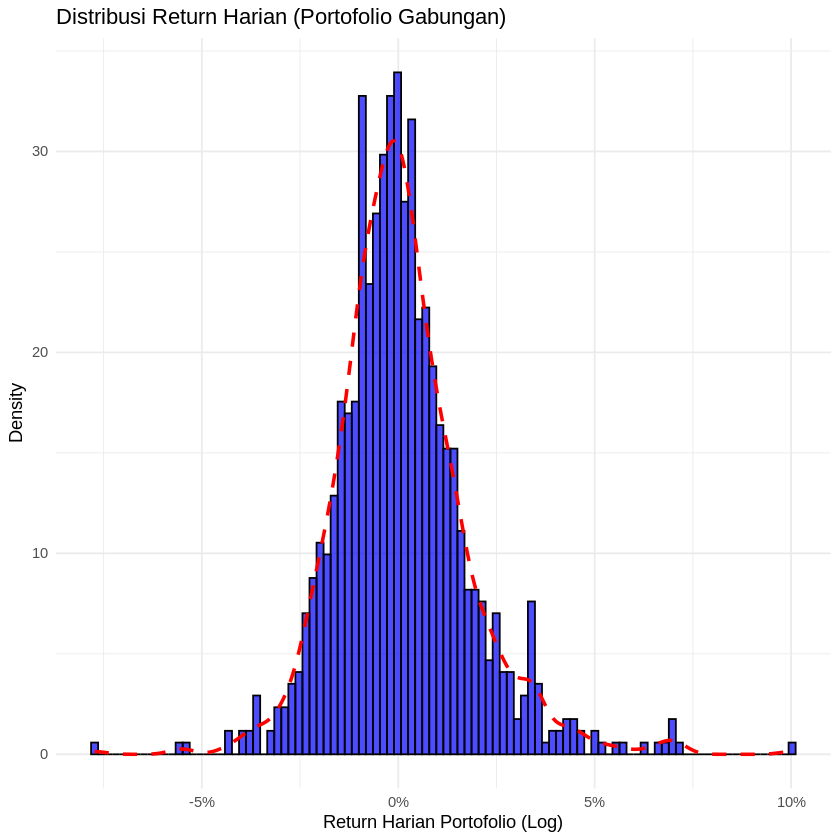

In [ ]:
# Hitung return portofolio historis
portfolio_returns_df <- returns_data_wide %>%
  mutate(portfolio_return = (PTBA.JK * bobot[1]) + (SMBR.JK * bobot[2]) + (RMKE.JK * bobot[3]))

# Plot 2: Histogram + Density Plot dari Portofolio Gabungan
plot_hist_portfolio <- ggplot(portfolio_returns_df, aes(x = portfolio_return)) +
  geom_histogram(aes(y = ..density..), bins = 100, fill = "blue", color = "black", alpha = 0.7) +
  geom_density(color = "red", size = 1, linetype = "dashed") +
  labs(title = "Distribusi Return Harian (Portofolio Gabungan)",
       x = "Return Harian Portofolio (Log)",
       y = "Density") +
  scale_x_continuous(labels = scales::percent) + # Tampilkan sebagai %
  theme_minimal()

suppressWarnings(print(plot_hist_portfolio))

In [ ]:
# ESTIMASI DERAJAT KEBEBASAN OPTIMAL MENGGUNAKAN MLE (Maximum Likelihood Estimation)
# Estimasi kemungkinan Maksimum

library(MASS)  # untuk memakai fungsi fitdistr()
               # fungsi fitdistr() ini digunakan untuk mencocokan data pada suatu distribusi (disini memakai distribusi-t)

cat("ESTIMASI PARAMETER DISTRIBUSI-T (MLE)\n")
cat("===============================================\n")

# Hitung return portofolio historis
portfolio_returns_historical <- portfolio_returns_df$portfolio_return

# Fit distribusi-t menggunakan Maximum Likelihood
fit_t <- fitdistr(portfolio_returns_historical, "t")

# Ekstrak parameter
df_optimal <- fit_t$estimate["df"]
location <- fit_t$estimate["m"]
scale <- fit_t$estimate["s"]

cat("Parameter Distribusi-t Student (MLE):\n")
cat("---------------------------------------\n")
cat(paste("Derajat Kebebasan (df) optimal:", round(df_optimal, 2), "\n"))
cat(paste("Location (mean):", round(location, 6), "\n"))
cat(paste("Scale (volatility):", round(scale, 6), "\n"))
cat(paste("Standard Error df:", round(fit_t$sd["df"], 2), "\n"))

# Update df untuk simulasi
df <- round(df_optimal)
cat(paste("df yang akan digunakan untuk simulasi:", df, "\n"))


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




ESTIMASI PARAMETER DISTRIBUSI-T (MLE)


Warning message in dt((x - m)/s, df, log = TRUE):
“NaNs produced”
Warning message in log(s):
“NaNs produced”
Warning message in log(s):
“NaNs produced”
Warning message in log(s):
“NaNs produced”
Warning message in log(s):
“NaNs produced”
Warning message in log(s):
“NaNs produced”
Warning message in log(s):
“NaNs produced”
Warning message in log(s):
“NaNs produced”
Warning message in log(s):
“NaNs produced”
Warning message in log(s):
“NaNs produced”
Warning message in log(s):
“NaNs produced”
Warning message in log(s):
“NaNs produced”
Warning message in log(s):
“NaNs produced”
Warning message in log(s):
“NaNs produced”
Warning message in log(s):
“NaNs produced”
Warning message in log(s):
“NaNs produced”
Warning message in log(s):
“NaNs produced”
Warning message in log(s):
“NaNs produced”
Warning message in log(s):
“NaNs produced”


Parameter Distribusi-t Student (MLE):
---------------------------------------
Derajat Kebebasan (df) optimal: 4.03 
Location (mean): -0.000338 
Scale (volatility): 0.012343 
Standard Error df: 0.57 
df yang akan digunakan untuk simulasi: 4 


In [ ]:
# Menentukan Derajat Kebebasan untuk distribusi-t
df <- 4

# FUNGSI ACCEPTANCE-REJECTION :
# Target: Distribusi-t Student dengan df derajat kebebasan
# Proposal: Distribusi Cauchy (lebih mudah dibangkitkan)

# INVERSE TRANSFORM METHOD :
# Untuk membangkitkan uniform(0,1) yang digunakan di acceptance-rejection

acceptance_rejection_t <- function(n, df) {
  # Konstanta normalisasi untuk acceptance-rejection
  # mengunakan Cauchy sebagai proposal distribution
  # f(x) = target density (t-distribution)
  # g(x) = proposal density (Cauchy)
  # M = konstanta sehingga f(x) <= M * g(x) untuk semua x

  M <- sqrt((df + 1) / df) * gamma((df + 1)/2) / gamma(df/2)

  samples <- numeric(n)
  accepted <- 0
  total_attempts <- 0

  while(accepted < n) {
    # 1. Bangkitkan kandidat dari Cauchy menggunakan INVERSE TRANSFORM
    u <- runif(1)
    y <- tan(pi * (u - 0.5))  # Inverse CDF dari Cauchy

    # 2. Hitung rasio acceptance
    # Density t-distribution
    f_y <- dt(y, df)
    # Density Cauchy
    g_y <- 1 / (pi * (1 + y^2))

    # 3. Acceptance step
    u2 <- runif(1)
    if (u2 <= (f_y / (M * g_y))) {
      accepted <- accepted + 1
      samples[accepted] <- y
    }

    total_attempts <- total_attempts + 1
  }

  acceptance_rate <- n / total_attempts
  cat(paste("Tingkat Penerimaan:", round(acceptance_rate * 100, 2), "%\n"))

  return(list(samples = samples, rate = acceptance_rate))
}

# Hitung faktor standardisasi untuk t-distribution
t_variance <- df / (df - 2)
t_sd <- sqrt(t_variance)

cat("SIMULASI MENGGUNAKAN ACCEPTANCE-REJECTION\n")
cat("===========================================\n")
cat(paste("Jumlah simulasi:", jumlah_simulasi, "\n"))
cat(paste("Derajat kebebasan (df):", df, "\n"))
cat(paste("Jumlah hari:", jumlah_hari, "\n\n"))

# Hitung Dekomposisi Cholesky untuk struktur korelasi
# Ukuran matriks 3 x 3
cholesky_decomp <- chol(cov_matrix)

all_acceptance_rates <- numeric(jumlah_simulasi)

# Jalankan simulasi menggunakan Acceptance-Rejection
simulation_results <- sapply(1:jumlah_simulasi, function(sim) {

  if (sim %% 1000 == 0) {
    cat(paste("Simulasi ke-", sim, "...\n"))
  }
  result_list <- acceptance_rejection_t(jumlah_hari * banyak_aset, df)
  all_acceptance_rates[sim] <<- result_list$rate

  # Bangkitkan return acak INDEPENDEN menggunakan ACCEPTANCE-REJECTION
  # Ukuran matriks 30 x 3
  uncorrelated_randoms <- matrix(
    result_list$samples,
    nrow = jumlah_hari,
    ncol = banyak_aset
  )

  # Standarisasi agar variansi = 1
  standardized_randoms <- uncorrelated_randoms / t_sd

  # Masukkan korelasi menggunakan Cholesky decomposition
  # Ukuran Martiks 30 x 3
  simulated_returns <- (standardized_randoms %*% cholesky_decomp) +
                        matrix(mean_returns,
                               nrow = jumlah_hari,
                               ncol = banyak_aset,
                               byrow = TRUE)

  # Hitung return portofolio harian
  # Ukuran matriks 30 x 1
  portfolio_returns <- simulated_returns %*% bobot

  # Hitung nilai akhir portofolio
  nilai_final <- portofolio_awal * exp(sum(portfolio_returns))

  return(nilai_final)
})

cat("SIMULASI SELESAI\n")

# Hitung Rata-rata Total
rata_rata_rate <- mean(all_acceptance_rates)

cat("========================================\n")
cat("VALIDASI ALGORITMA:\n")
cat(paste("Rata-rata Acceptance Rate (Empiris):", round(rata_rata_rate * 100, 4), "%\n"))

SIMULASI MENGGUNAKAN ACCEPTANCE-REJECTION
Jumlah simulasi: 10000 
Derajat kebebasan (df): 4 
Jumlah hari: 30 

Tingkat Penerimaan: 71.43 %
Tingkat Penerimaan: 67.16 %
Tingkat Penerimaan: 72 %
Tingkat Penerimaan: 69.77 %
Tingkat Penerimaan: 65.69 %
Tingkat Penerimaan: 66.67 %
Tingkat Penerimaan: 75 %
Tingkat Penerimaan: 67.67 %
Tingkat Penerimaan: 69.23 %
Tingkat Penerimaan: 68.7 %
Tingkat Penerimaan: 68.7 %
Tingkat Penerimaan: 70.87 %
Tingkat Penerimaan: 69.23 %
Tingkat Penerimaan: 62.07 %
Tingkat Penerimaan: 62.94 %
Tingkat Penerimaan: 70.87 %
Tingkat Penerimaan: 72 %
Tingkat Penerimaan: 61.64 %
Tingkat Penerimaan: 71.43 %
Tingkat Penerimaan: 70.31 %
Tingkat Penerimaan: 73.17 %
Tingkat Penerimaan: 66.67 %
Tingkat Penerimaan: 68.18 %
Tingkat Penerimaan: 67.67 %
Tingkat Penerimaan: 68.7 %
Tingkat Penerimaan: 66.67 %
Tingkat Penerimaan: 69.77 %
Tingkat Penerimaan: 66.67 %
Tingkat Penerimaan: 66.67 %
Tingkat Penerimaan: 70.87 %
Tingkat Penerimaan: 60 %
Tingkat Penerimaan: 62.07 %
Tingkat 

In [ ]:
print(cholesky_decomp)

          PTBA.JK     SMBR.JK     RMKE.JK
PTBA.JK 0.0208231 0.002858604 0.002000274
SMBR.JK 0.0000000 0.027498652 0.000407933
RMKE.JK 0.0000000 0.000000000 0.033903694


## Penjelasan Metode Acceptance-Rejection

**Konsep Dasar:**

Acceptance-Rejection adalah metode untuk membangkitkan bilangan acak dari distribusi target f(x) yang sulit dibangkitkan secara langsung, dengan menggunakan distribusi proposal g(x) yang lebih mudah.

**Langkah-langkah:**

1. **Pilih proposal distribution g(x)**: Dalam kasus ini, kita gunakan Cauchy karena:
   - Mudah dibangkitkan menggunakan Inverse Transform: Y = tan(π(U - 0.5))
   - Memiliki ekor tebal seperti distribusi-t
   - Dapat dibangkitkan secara analitis

2. **Tentukan konstanta M**: Sehingga f(x) ≤ M·g(x) untuk semua x
   - M = √((df+1)/df) · Γ((df+1)/2) / Γ(df/2)

3. **Generate kandidat**:
   - Bangkitkan Y ~ g(x) menggunakan Inverse Transform
   - Bangkitkan U ~ Uniform(0,1)

4. **Tes penerimaan**:
   - Jika U ≤ f(Y)/(M·g(Y)), terima Y
   - Jika tidak, tolak dan ulangi

## Penjelasan Metode Inverse Transform

**Konsep Dasar:**

Inverse Transform Method (Metode Transformasi Invers) adalah teknik fundamental untuk membangkitkan bilangan acak dari distribusi kontinu F(x).

**Teorema:**

Jika U ~ Uniform(0,1) dan X = F⁻¹(U), maka X ~ F

**Aplikasi dalam Penelitian Ini:**

1. **Untuk distribusi Uniform**: Menggunakan generator bawaan R (runif)

2. **Untuk distribusi Cauchy**:
   - CDF: F(x) = (1/π)arctan(x) + 1/2
   - Inverse CDF: F⁻¹(u) = tan(π(u - 1/2))
   - Langkah: Bangkitkan U ~ Uniform(0,1), lalu Y = tan(π(U - 0.5))

**Dalam Konteks Acceptance-Rejection:**
Inverse Transform digunakan untuk membangkitkan:
- Bilangan uniform U ~ Uniform(0,1) untuk acceptance test
- Kandidat dari distribusi Cauchy sebagai proposal distribution

HASIL ANALISIS RISIKO PORTOFOLIO
Metode: Acceptance-Rejection + Inverse Transform
Modal Awal: Rp 1e+08 


Nilai Portofolio Rata-Rata: Rp 103,180,243 
Standar Deviasi: Rp 9,638,319 
Value at Risk (VaR) 95%: Rp 11,833,469 

INTERPRETASI:
Ada 5% kemungkinan Anda akan rugi LEBIH DARI Rp 11,833,469 dalam 30 hari.
Atau dengan 95% keyakinan, kerugian maksimum adalah Rp 11,833,469 



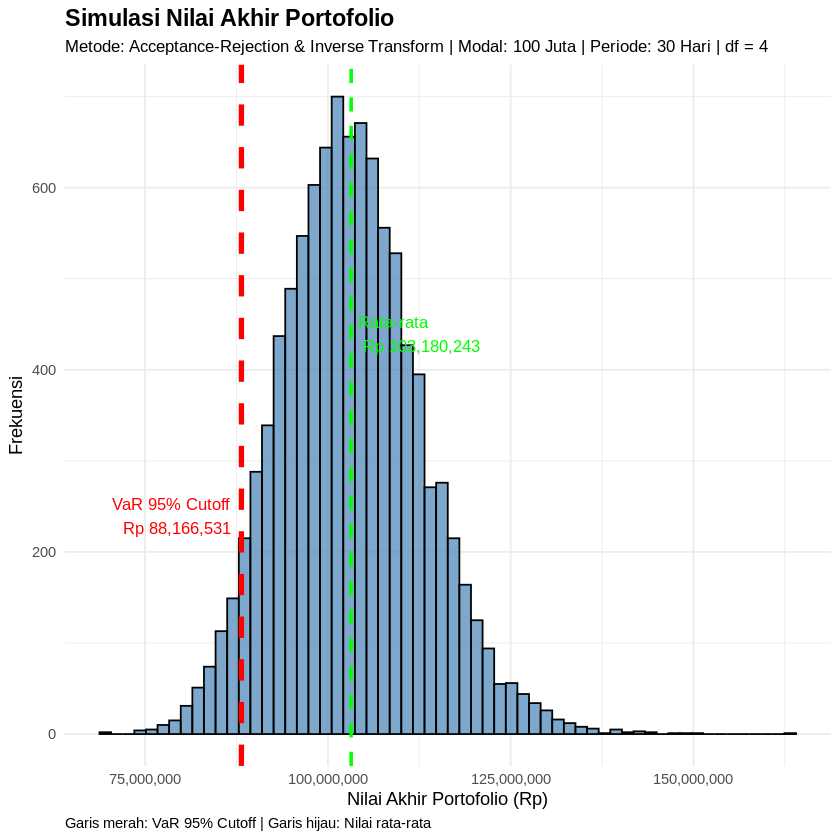

In [ ]:
# ANALISIS HASIL (VaR & PLOTTING)

set.seed(432)
results_df <- data.frame(nilai_final = simulation_results)
results_df$loss <- portofolio_awal - results_df$nilai_final

# Hitung VaR 95%
var_95 <- quantile(results_df$loss, probs = 0.95)

cat("HASIL ANALISIS RISIKO PORTOFOLIO\n")
cat("===========================================\n")
cat(paste("Metode: Acceptance-Rejection + Inverse Transform\n"))
cat(paste("Modal Awal: Rp", format(portofolio_awal, big.mark = ",")),"\n")
cat(paste("Nilai Portofolio Rata-Rata: Rp", format(mean(results_df$nilai_final), big.mark = ",", nsmall = 0)),"\n")
cat(paste("Standar Deviasi: Rp", format(sd(results_df$nilai_final), big.mark = ",", nsmall = 0)),"\n")
cat(paste("Value at Risk (VaR) 95%: Rp", format(var_95, big.mark = ",", nsmall = 0)),"\n")
cat("\n")
cat("INTERPRETASI:\n")
cat(paste("Ada 5% kemungkinan Anda akan rugi LEBIH DARI Rp", format(var_95, big.mark = ",", nsmall = 0), "dalam 30 hari.\n"))
cat(paste("Atau dengan 95% keyakinan, kerugian maksimum adalah Rp", format(var_95, big.mark = ",", nsmall = 0), "\n"))
cat("===========================================\n\n")

# Visualisasi
var_cutoff_value <- portofolio_awal - var_95
plot <- ggplot(results_df, aes(x = nilai_final)) +
  geom_histogram(bins = 60, fill = "steelblue", alpha = 0.7, color = "black") +
  geom_vline(xintercept = var_cutoff_value, color = "red", linetype = "dashed", size = 1.5) +
  geom_vline(xintercept = mean(results_df$nilai_final), color = "green", linetype = "dashed", size = 1) +
  labs(title = "Simulasi Nilai Akhir Portofolio",
       subtitle = "Metode: Acceptance-Rejection & Inverse Transform | Modal: 100 Juta | Periode: 30 Hari | df = 4",
       x = "Nilai Akhir Portofolio (Rp)",
       y = "Frekuensi",
       caption = "Garis merah: VaR 95% Cutoff | Garis hijau: Nilai rata-rata") +
  annotate("text",
           x = var_cutoff_value,
           y = 200,
           label = paste("VaR 95% Cutoff\nRp", format(var_cutoff_value, big.mark = ",", nsmall = 0)),
           color = "red", vjust = -0.5, hjust = 1.1, size = 3.5) +
  annotate("text",
           x = mean(results_df$nilai_final),
           y = 400,
           label = paste("Rata-rata\nRp", format(mean(results_df$nilai_final), big.mark = ",", nsmall = 0)),
           color = "green", vjust = -0.5, hjust = -0.1, size = 3.5) +
  scale_x_continuous(labels = scales::comma) +
  theme_minimal() +
  theme(plot.title = element_text(face = "bold", size = 14),
        plot.subtitle = element_text(size = 10),
        plot.caption = element_text(hjust = 0))

print(plot)

## Interpretasi Value at Risk (VaR)

**Sisi 95% (Keyakinan):**

Dalam 95% dari 10,000 skenario yang disimulasikan menggunakan metode Acceptance-Rejection, kerugian akan lebih kecil dari nilai VaR yang dihitung, atau bahkan portofolio akan mengalami keuntungan (seperti nilai rata-rata yang umumnya positif).

**Sisi 5% (Risiko Ekstrem):**

VaR 95% menandai batas "worst-case scenario" untuk 95% kepercayaan. Ada 5% kemungkinan kerugian akan melebihi nilai VaR. Namun, VaR tidak memberitahu seberapa besar kerugian di luar threshold tersebut.

**Keunggulan Metode yang Digunakan:**

1. **Acceptance-Rejection Method**: Menghasilkan sampel exact dari distribusi-t Student tanpa aproksimasi
2. **Inverse Transform Method**: Memberikan fondasi matematis yang solid untuk pembangkitan bilangan acak
3. **Distribusi-t Student**: Menangkap fat-tails dan extreme events lebih baik daripada distribusi normal
4. **Simulasi Berbasis**: Memberikan distribusi lengkap hasil (bukan hanya point estimate)

**Catatan Penting:**

Metode ini BUKAN Monte Carlo klasik yang menggunakan built-in random generators, melainkan implementasi eksplisit dari:
- Inverse Transform untuk membangkitkan Uniform dan Cauchy
- Acceptance-Rejection untuk membangkitkan distribusi-t dari proposal Cauchy
- Cholesky decomposition untuk struktur korelasi antar aset

## Visualisasi Metode Acceptance-Rejection

Mari visualisasikan bagaimana metode Acceptance-Rejection bekerja dengan membandingkan distribusi target (t-Student) dengan proposal (Cauchy).

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.



Theoretical Acceptance Rate: 67.28 %


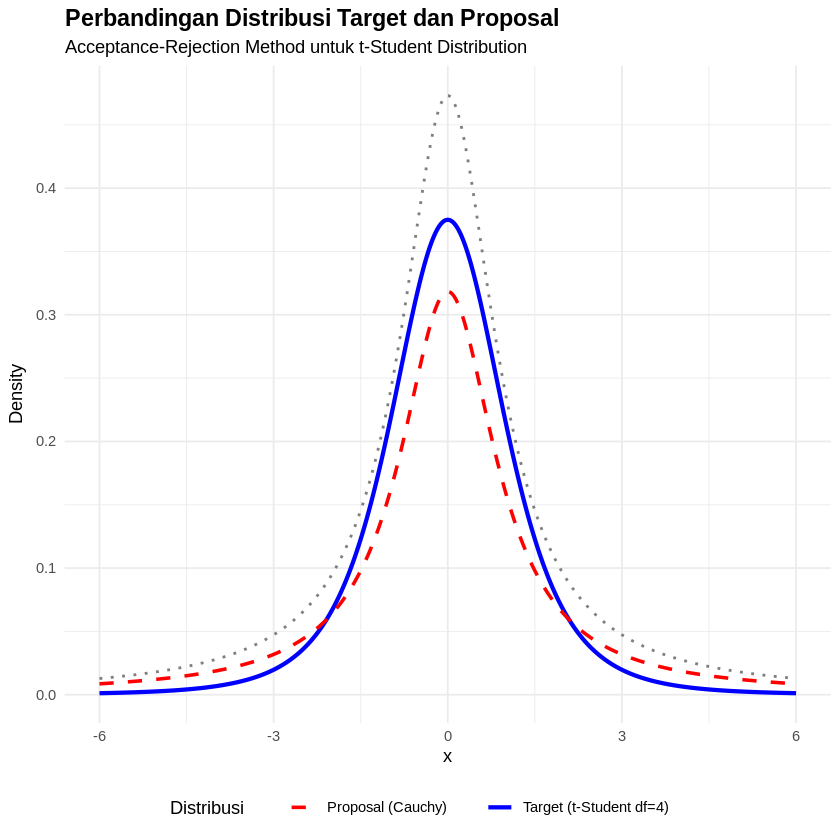

In [ ]:
# VISUALISASI PERBANDINGAN DISTRIBUSI

# Buat grid untuk plotting
x <- seq(-6, 6, length.out = 1000)

# Hitung densitas distribusi target (t-Student)
target_density <- dt(x, df = df)

# Hitung densitas proposal (Cauchy)
cauchy_density <- dcauchy(x)

# Hitung M (konstanta envelope)
M <- sqrt((df + 1) / df) * gamma((df + 1)/2) / gamma(df/2)

# Buat dataframe untuk plotting
comparison_df <- data.frame(
  x = x,
  target = target_density,
  proposal = cauchy_density,
  envelope = M * cauchy_density
)

# Plot perbandingan distribusi
envelope_label <- paste0("Envelope (M*Cauchy, M=", round(M, 2), ")")

plot_comparison <- ggplot(comparison_df, aes(x = x)) +
  geom_line(aes(y = target, color = "Target (t-Student df=4)"), size = 1.2) +
  geom_line(aes(y = proposal, color = "Proposal (Cauchy)"), size = 1, linetype = "dashed") +
  geom_line(aes(y = envelope, color = envelope_label),
            size = 0.8, linetype = "dotted") +
  scale_color_manual(
    name = "Distribusi",
    values = c("Target (t-Student df=4)" = "blue",
               "Proposal (Cauchy)" = "red"),
    breaks = c("Target (t-Student df=4)", "Proposal (Cauchy)", envelope_label)
  ) +
  scale_color_manual(values = c("Target (t-Student df=4)" = "blue",
                                 "Proposal (Cauchy)" = "red",
                                 "Envelope (M*Cauchy, M=1.13)" = "green")) +
  labs(title = "Perbandingan Distribusi Target dan Proposal",
       subtitle = "Acceptance-Rejection Method untuk t-Student Distribution",
       x = "x",
       y = "Density",
       color = "Distribusi") +
  theme_minimal() +
  theme(legend.position = "bottom",
        plot.title = element_text(face = "bold", size = 14))

print(plot_comparison)

# Hitung theoretical acceptance rate
theoretical_acceptance_rate <- 1 / M
cat(paste("\nTheoretical Acceptance Rate:", round(theoretical_acceptance_rate * 100, 2), "%\n"))

## Demonstrasi Inverse Transform Method

Mari kita demonstrasikan bagaimana Inverse Transform Method bekerja untuk distribusi Cauchy.

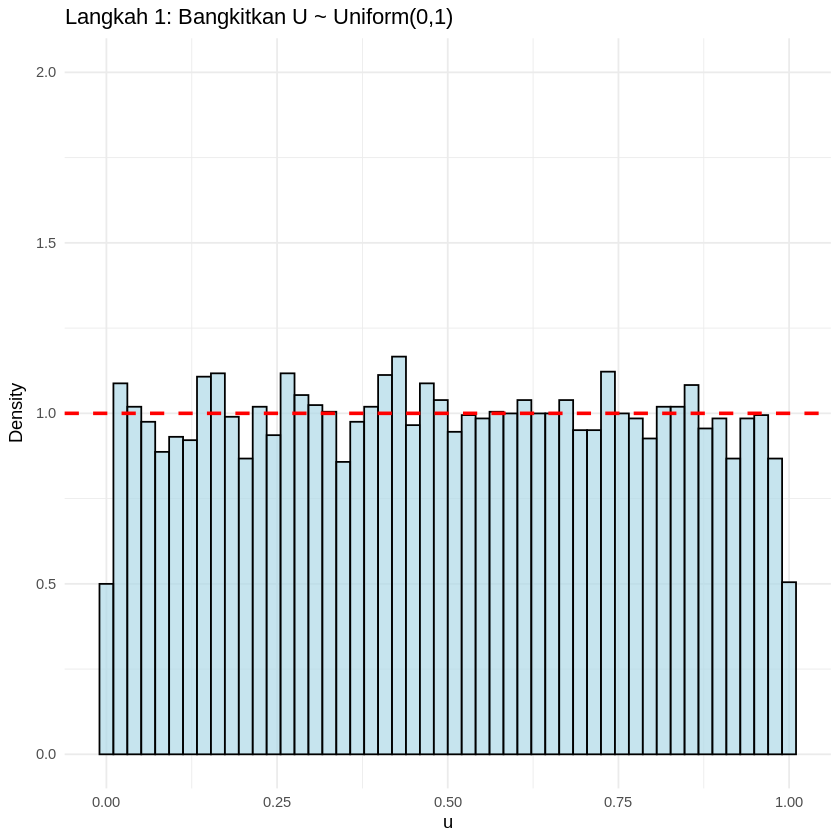


VERIFIKASI INVERSE TRANSFORM METHOD
Mean Cauchy (teoritis: 0): -0.0744 
Jumlah sampel: 10000 


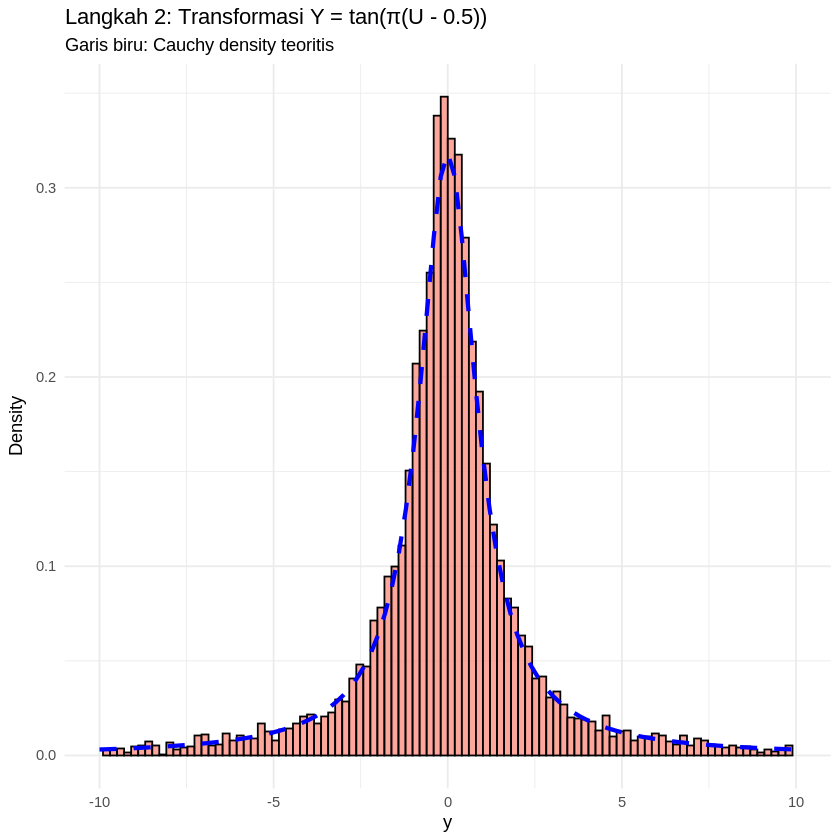

In [ ]:
# DEMONSTRASI INVERSE TRANSFORM METHOD

set.seed(123)
n_demo <- 10000

# Bangkitkan bilangan uniform U(0,1)
u_samples <- runif(n_demo)

# Terapkan inverse CDF Cauchy: tan(π(u - 0.5))
cauchy_samples <- tan(pi * (u_samples - 0.5))

# Buat dataframe untuk plotting
demo_df <- data.frame(
  uniform = u_samples,
  cauchy = cauchy_samples
)

# Plot 1: Distribusi Uniform
plot_uniform <- ggplot(demo_df, aes(x = uniform)) +
  geom_histogram(aes(y = ..density..), bins = 50, fill = "lightblue", color = "black", alpha = 0.7) +
  geom_hline(yintercept = 1, color = "red", linetype = "dashed", size = 1) +
  labs(title = "Langkah 1: Bangkitkan U ~ Uniform(0,1)",
       x = "u",
       y = "Density") +
  ylim(0, 2) +
  theme_minimal()

# Plot 2: Transformasi ke Cauchy
plot_cauchy <- ggplot(demo_df, aes(x = cauchy)) +
  geom_histogram(aes(y = ..density..), bins = 100, fill = "salmon", color = "black", alpha = 0.7) +
  stat_function(fun = dcauchy, color = "blue", size = 1.2, linetype = "dashed") +
  xlim(-10, 10) +
  labs(title = "Langkah 2: Transformasi Y = tan(π(U - 0.5))",
       subtitle = "Garis biru: Cauchy density teoritis",
       x = "y",
       y = "Density") +
  theme_minimal()

# Tampilkan plot
suppressWarnings(print(plot_uniform))
cat("\n")
suppressWarnings(print(plot_cauchy))

cat("\n========================================\n")
cat("VERIFIKASI INVERSE TRANSFORM METHOD\n")
cat("========================================\n")
cat(paste("Mean Cauchy (teoritis: 0):", round(mean(cauchy_samples[abs(cauchy_samples) < 100]), 4), "\n"))
cat(paste("Jumlah sampel:", n_demo, "\n"))

## Ringkasan Metodologi

**(Acceptance-Rejection + Inverse Transform):**

1. **Inverse Transform Method**
   - Digunakan untuk membangkitkan U ~ Uniform(0,1)
   - Digunakan untuk membangkitkan Cauchy: Y = tan(π(U - 0.5))
   - Formula analitis eksplisit

2. **Acceptance-Rejection Method**
   - Target: Distribusi-t Student (df = 4, sesuai hasil dari metode MLE)
   - Proposal: Distribusi Cauchy (lebih mudah dibangkitkan)
   - Konstanta (M) dihitung secara matematis
   - Tingkat penerimaan dimonitor dan dilaporkan


Tingkat Penerimaan: 67.42 %


Warning message:
“Removed 39 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 39 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


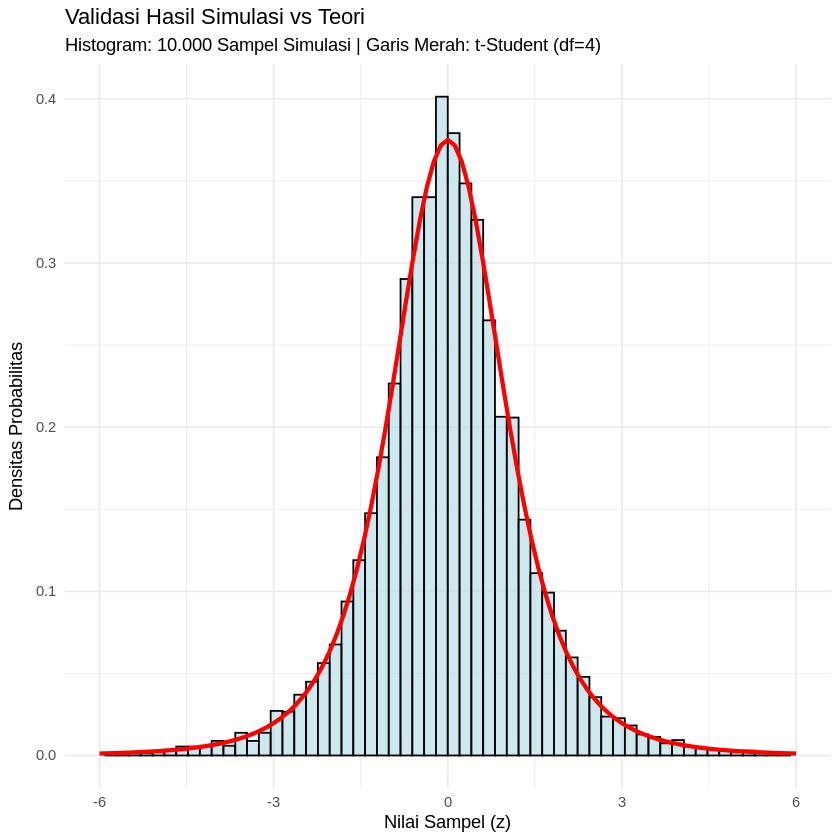

In [ ]:
# 1. Ambil sampel dari fungsi yang sudah Anda buat
hasil_ar <- acceptance_rejection_t(10000, df=4)
sampel_simulasi <- hasil_ar$samples

# 2. Buat Dataframe
df_validasi <- data.frame(nilai = sampel_simulasi)

# 3. Plot Histogram (Data) vs Kurva Teoritis (Garis Merah)
library(ggplot2)

plot_validasi <- ggplot(df_validasi, aes(x = nilai)) +
  # A. Histogram dari data simulasi (Empiris)
  geom_histogram(aes(y = ..density..), bins = 60, 
                 fill = "lightblue", color = "black", alpha = 0.6) +
  
  # B. Garis Kurva t-Student Teoritis (df=4)
  stat_function(fun = dt, args = list(df = 4), 
                color = "red", size = 1.2, linetype = "solid") +
  
  # C. Label dan Judul
  labs(title = "Validasi Hasil Simulasi vs Teori",
       subtitle = "Histogram: 10.000 Sampel Simulasi | Garis Merah: t-Student (df=4)",
       x = "Nilai Sampel (z)",
       y = "Densitas Probabilitas") +
  
  # D. Batasi sumbu X agar terlihat jelas (fokus ke tengah)
  xlim(-6, 6) +
  theme_minimal()

# 4. Simpan Gambar
ggsave("validasi_t_student.png", plot = plot_validasi, width = 8, height = 5)
print(plot_validasi)